In [37]:
import pandas as pd
from  matplotlib import pyplot as plt
import numpy as np

## Question 1: For dataset “real_estate.csv”, write Jupyter Notebook scripts to do the following sequential steps:

- Data import
  - Import the real estate data into python

In [3]:
real_estate = pd.read_csv("./real_estate.csv")
    

- Descriptive statistics of the house variables
  - Produce a Pandas DataFrame to show how many missing values there are for each variable (columns) and what percentage of the values are missing for each variable.
  - Use the ‘’describe” function in Pandas DataFrame to see some descriptive statistics for this data. Usage of this function can be found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html


In [ ]:
missing_realestate = real_estate.isnull().sum()

pd.DataFrame({"amount_missing": missing_realestate, 
              "percent_missing": missing_realestate / real_estate.count()})


,amount_missing,percent_missing
op_type,0,0.000000
district,15,0.003209
street,452,0.106679
rooms,189,0.042000
area,364,0.084162
floor,333,0.076446
total_floors,344,0.079171
house_seria,442,0.104073
house_type,450,0.106157
condition,406,0.094793


In [19]:
real_estate.describe(include="all")

,op_type,district,street,rooms,area,floor,total_floors,house_seria,house_type,condition,price,lat,lon
count,4689,4674,4237,4500,4325.000000,4356.000000,4345.000000,4247,4239,4283,4219.000000,4482.000000,4482.000000
unique,6,51,2543,7,NaN,NaN,NaN,15,6,3,NaN,NaN,NaN
top,For sale,centrs,Kungu 25,2,NaN,NaN,NaN,P. kara,Masonry,All amenities,NaN,NaN,NaN
freq,2680,1435,25,1548,NaN,NaN,NaN,877,1322,4094,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,61.204557,4.552342,6.160184,NaN,NaN,NaN,58728.706803,55.831982,22.303814
std,NaN,NaN,NaN,NaN,36.089986,8.565853,4.326098,NaN,NaN,NaN,76252.501519,3.255038,8.571356
min,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,5.000000,46.314475,-100.708194
25%,NaN,NaN,NaN,NaN,39.000000,2.000000,5.000000,NaN,NaN,NaN,450.000000,56.936154,24.065920
50%,NaN,NaN,NaN,NaN,53.000000,3.000000,5.000000,NaN,NaN,NaN,40000.000000,56.952443,24.122890
75%,NaN,NaN,NaN,NaN,75.000000,5.000000,7.000000,NaN,NaN,NaN,82000.000000,56.963540,24.168477


- Data filtering
  - Remove houses that do not have the price information
  - Remove houses that do not have the street information

In [25]:
filtered_real_estate = real_estate.dropna(subset = ["price", "street"])


- Heteroscedasticity pt 1
  - Histogram
    - Make a histogram of the house prices. Is this approximately normally distributed?
        - **The data is not normally distributed, it is left-skewed**
    - Take log2 transform of the house prices. Make a histogram of the house prices after this transformation. What do you find?
        - **The data is still not normally distributed and now has two peaks**


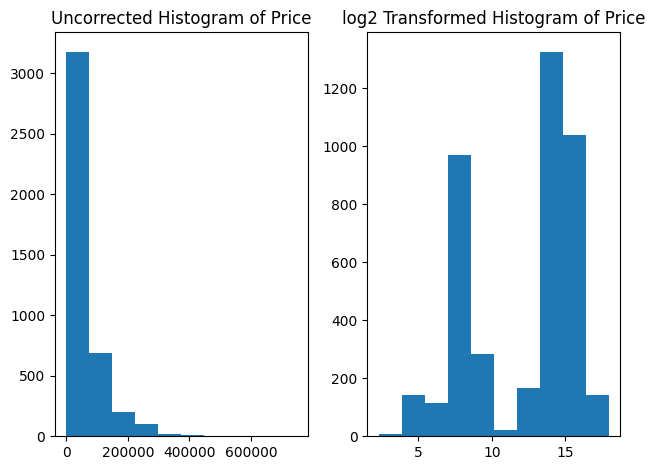

In [75]:
## Make a histogram of the house prices. Is this approximately normally distributed?
# Take log2 transform of the house prices. Make a histogram of the house prices after this transformation. What do you find?
counts, bins = np.histogram(filtered_real_estate["price"])
fig, (axs1, axs2) = plt.subplots(1,2)
axs1.hist(bins[:-1], weights=counts)
axs1.set_title("Uncorrected Histogram of Price")

counts, bins = np.histogram(np.log2(filtered_real_estate["price"]))
axs2.hist(bins[:-1], weights=counts)
axs2.set_title("log2 Transformed Histogram of Price")

plt.tight_layout()

- Heteroscedasticity pt 2
  - Scatterplot
    - For the houses with the “op_type” being “For sale”, make a scatter plot of the house price (y axis) vs the area (x axis).
        
    -  For the houses with the “op_type” being “For sale”, make a scatter plot of the log2 transformed house price (y axis) vs the area (x axis).
    -  For the houses with the “op_type” being “For rent”, make a scatter plot of the house price (y axis) vs the area (x axis).
    -  For the houses with the “op_type” being “For rent”, make a scatter plot of the log2 transformed house price (y axis) vs the area (x axis).
    -  Describe what you find.
        - **For area vs housing prices for sale and area vs housing prices for rent there is heteroscedasticity since the variation of the data points is not constant, so there is unconsistent spread around a regression line. The heteroscedasticity is alieviated by the log2 transformation for both housing prices for sale and housing prices for rent.**

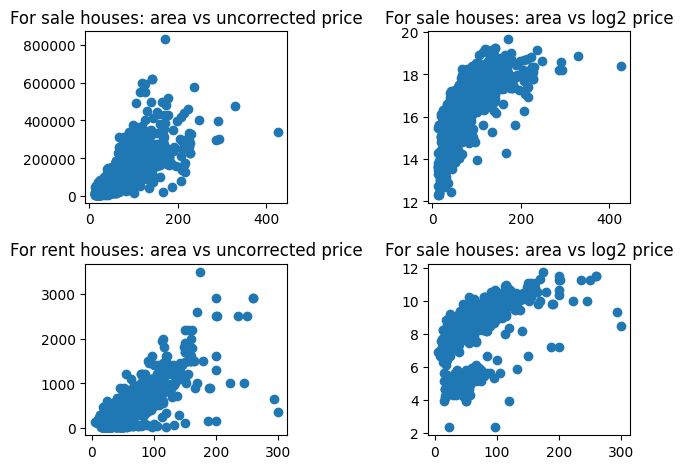

In [87]:
fig, axs = plt.subplots(2,2)

## For the houses with the “op_type” being “For sale”, make a scatter plot of the house price (y axis) vs the area (x axis).
# For the houses with the “op_type” being “For sale”, make a scatter plot of the log2 transformed house price (y axis) vs the area (x axis).

optype_for_sale = filtered_real_estate[filtered_real_estate.op_type.isin(["For sale"])]

axs[0,0].scatter(optype_for_sale["area"], optype_for_sale["price"])
axs[0,0].set_title("For sale houses: area vs uncorrected price")

axs[0,1].scatter(optype_for_sale["area"], np.log2(optype_for_sale["price"]))
axs[0,1].set_title("For sale houses: area vs log2 price")


# For the houses with the “op_type” being “For rent”, make a scatter plot of the house price (y axis) vs the area (x axis).
# For the houses with the “op_type” being “For rent”, make a scatter plot of the log2 transformed house price (y axis) vs the area (x axis).
optype_for_rent = filtered_real_estate[filtered_real_estate.op_type.isin(["For rent"])]
axs[1,0].scatter(optype_for_rent["area"], optype_for_rent["price"])
axs[1,0].set_title("For rent houses: area vs uncorrected price")

axs[1,1].scatter(optype_for_rent["area"], np.log2(optype_for_rent["price"]))
axs[1,1].set_title("For sale houses: area vs log2 price")
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=None)
plt.show()

- Question 2: For dataset “SCLC_study_output_filtered_2.csv” (rows = samples, columns=variables/signals), write Jupyter Notebook scripts to do the following.
    - Scaling
        - Write a function to do pareto scaling of all of the variables.
        - Make a plot comparing the standard deviation of each variable before and after the scaling
    - Normalization
        - Write a function to do median normalization of the samples.
        - Make a plot comparing the median of all signals in a sample with the median of all signals in the sample after median normalization
    - Describe what you find.